# Đề thi mẫu chứng chỉ TensorFlow - Dạng bài 04

```
ProtonX - TensorFlow Class 
```
Giới thiệu về chứng chỉ - https://www.tensorflow.org/certificate

> Chú ý: đọc kỹ các nội dung trong Handle Notebook trong liên kết trên.

---

**Bài toán: Phân loại câu mỉa mai !**

### Hướng dẫn làm bài  
- Trong phần bài tập này, các bạn sẽ thực hiện tương tự bài IMDB Dataset.

Yêu cầu:
- Sử dụng TensorFlow.
- Sử dụng Callback.
- Sử dụng các mạng LSTM, GRU, Bi-LSTM, v.v...
- Tỷ lệ chính xác trên tập Test > 85 - 87%.



### Thực hiện 

Dataset: https://rishabhmisra.github.io/publications/

In [1]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hướng dẫn về bộ dữ liệu này được thực hiện trong Lab Tokenizer 
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json
  
import json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
    

    
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


2023-10-07 23:29:04.310870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/bin/bash: /home/danieldu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/danieldu/anaconda3/lib/libuuid.so.1: no version information available (required by wget)
--2023-10-07 23:29:06--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.163.59, 172.217.160.123, 142.251.43.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.163.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  1.11MB/s    in 4.9s    

2023-10-07 23:29:11 (1.11 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-10-07 23:29:12.758498: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(
    training_padded,
    training_labels,
    epochs=100,
    validation_data=(testing_padded, testing_labels),
    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
____________________________________________________

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 0.4659 - accuracy: 0.7600 - val_loss: 0.4006 - val_accuracy: 0.8199
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 0.3533 - accuracy: 0.8418 - val_loss: 0.3969 - val_accuracy: 0.8162
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 0.3146 - accuracy: 0.8587 - val_loss: 0.3956 - val_accuracy: 0.8225
Epoch 4/100
625/625 [==============================] - 5s 8ms/step - loss: 0.2821 - accuracy: 0.8805 - val_loss: 0.4083 - val_accuracy: 0.8238
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 0.2482 - accuracy: 0.8954 - val_loss: 0.4370 - val_accuracy: 0.8213
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 0.2167 - accuracy: 0.9119 - val_loss: 0.4758 - val_accuracy: 0.8146
Epoch 7/100
625/625 [==============================] - 5s 7ms/step - loss: 0.1827 - accuracy: 0.9280 - val_loss: 0.5171 - val_accuracy: 0.8122

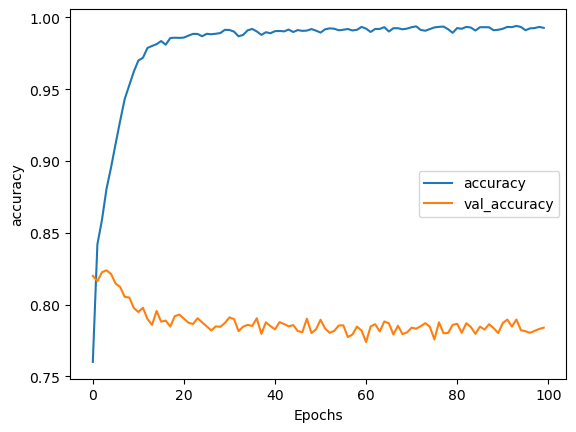

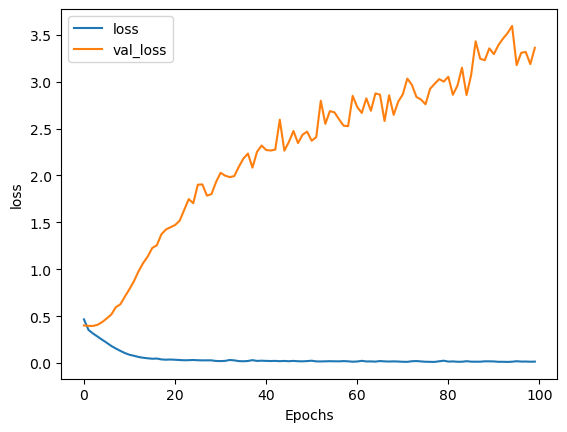

In [4]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [5]:
# Lưu Model và nộp 
model.save("mymodel.h5")